In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


#%%生成hdf5
#一维：
f1 = h5py.File('example1.hdf5', 'w')
group_1 = f1.create_group('PowerRabi')
group_2 = group_1.create_group('202308171418014560')
group_3 = group_1.create_group('202308171418157591')
data_1 = np.random.rand(120, 1, 7)
group_3.create_dataset('remote_population', data = data_1)
data_2 = np.random.rand(100, 1, 1)
group_2.create_dataset('remote_population', data = data_2)
'''
PowerRabi
PowerRabi/202308171418014560
PowerRabi/202308171418014560/remote_population
PowerRabi/202308171418157591
PowerRabi/202308171418157591/remote_population
'''

#二维：
f2 = h5py.File('example.hdf5', 'w')
group_1 = f2.create_group('PowerRabi')
group_2 = group_1.create_group('202308171418014560')
group_3 = group_1.create_group('202308171418157591')
data_1 = np.random.rand(10, 20, 7)
group_3.create_dataset('remote_population', data = data_1)
data_2 = np.random.rand(10, 20, 1)
group_2.create_dataset('remote_population', data = data_2)

'''
PowerRabi
PowerRabi/202308171418014560
PowerRabi/202308171418014560/remote_population
PowerRabi/202308171418157591remote_population
PowerRabi/202308171418157591/remote_population
'''

d:\software\anaconda\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


'\nPowerRabi\nPowerRabi/202308171418014560\nPowerRabi/202308171418014560/remote_population\nPowerRabi/202308171418157591remote_population\nPowerRabi/202308171418157591/remote_population\n'

In [26]:
file = f1
experiment_name = 'PowerRabi'
ID = '202308171418157591'
data_choose = 'remote_population'

def prt(name):
    print(name)

In [7]:
def draw_2d_n(file, experiment_name, ID, data_choose):
    data = file[experiment_name][ID][data_choose] #数据本身
    shape = data.shape#数据形状
    n = shape[2]#需要画n幅图
    row = 2
    col = (n//row) + (n % row)
    fig, axs = plt.subplots(row, col, figsize=(8,4))

    big_ax = fig.add_subplot(111, frame_on=False)
    big_ax.set_xticks([])
    big_ax.set_yticks([])
    big_ax.set_xlabel('x label')
    big_ax.set_ylabel('y label')
    big_ax.set_title(f'{experiment_name}, ID:{ID}')
    for i in range(n):
        slice_data = data[:,:,i]
        row_index = i // col
        col_index = i % col
        ax = axs[row_index, col_index]
        im = ax.imshow(slice_data, cmap='Blues', alpha=0.7)
        ax.set_title(f'{data_choose} {i}', fontsize = 10)
    cax = fig.add_axes([0.99, 0.12, 0.02, 0.83])
    plt.colorbar(im, ax=axs.ravel().tolist(), cax = cax)
    if n % 2 == 1:
        plt.delaxes(axs.flatten()[-1])
    plt.tight_layout()
    plt.show()


In [8]:
def draw_2d_1(file, experiment_name, ID, data_choose):
    data = file[experiment_name][ID][data_choose] #数据本身
    slice_data = data[:,:,0]
    plt.imshow(slice_data, cmap='Blues', alpha=0.7)
    plt.title(f'{experiment_name},{ID}')
    plt.colorbar()
    plt.show()

In [20]:
def draw_1d_1(file, experiment_name, ID, data_choose):
    data = file[experiment_name][ID][data_choose] #数据本身
    slice_data = data[:,0,0]
    plt.figure(figsize = (8,4))
    plt.plot(slice_data)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(f'{experiment_name},{ID}')
    plt.show()

In [32]:
def draw_1d_n(file, experiment_name, ID, data_choose):
    data = file[experiment_name][ID][data_choose] #数据本身
    shape = data.shape#数据形状
    n = shape[2]#需要画n幅图
    row = 2
    col = (n//row) + (n % row)
    fig, axs = plt.subplots(row, col, figsize=(8,3))

    big_ax = fig.add_subplot(111, frame_on=False)
    big_ax.set_xticks([])
    big_ax.set_yticks([])
    big_ax.set_xlabel('x label')
    big_ax.set_ylabel('y label')
    big_ax.set_title(f'{experiment_name}, ID:{ID}')
    for i in range(n):
        slice_data = data[:,0,i]
        row_index = i // col
        col_index = i % col
        ax = axs[row_index, col_index]
        ax.plot(slice_data)
        ax.set_title(f'{data_choose} {i}', fontsize = 10)
    if n % 2 == 1:
        plt.delaxes(axs.flatten()[-1])
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.show()

In [24]:
def data_view(file, experiment_name, ID, data_choose):
    data = file[experiment_name][ID][data_choose] #数据本身
    shape = data.shape#数据形状
    
    if shape[1] > 1:
        if shape[2] == 1:
            draw_2d_1(file, experiment_name, ID, data_choose)
        else:
            draw_2d_n(file, experiment_name, ID, data_choose)

    if shape[1] == 1:
        if shape[2] == 1:
            draw_1d_1(file, experiment_name, ID, data_choose)
        else:
            draw_1d_n(file, experiment_name, ID, data_choose)




    # if shape[1] == 1:
    #     fig, axs = plt.subplots(2,n//2+1, figsize=(8,8))
    #     #plt.title('Experiment',ID,experiment_name,data_choose)
    #     for i in range(2):
    #         for j in range(n//2+1):
    #             ax = axs[i,j]
    #             ax.plot(data[j+i(n//2+1)][0])
    #             ax.set_xlabel('a')
    #             ax.set_ylabel('b')
    #             ax.set_title(data_choose,f'{j+i(n//2+1)}')
    #     plt.tight_layout()
    #     plt.show()
    

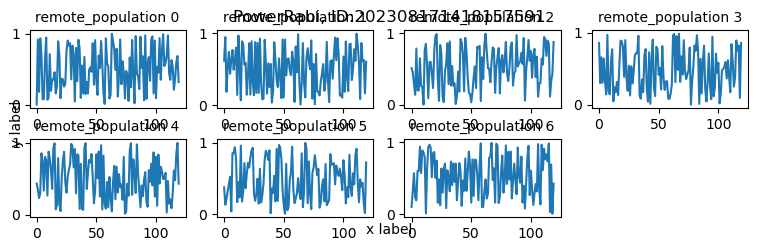

In [33]:
data_view(file, experiment_name, ID, data_choose)

In [6]:
f1.close()
f2.close()

NameError: name 'f2' is not defined